#Smart Justice: Predictive Analytics for Recidivism and Violent Behavior

##Importing Libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, linear_model, metrics, preprocessing, svm
from sklearn.metrics import ConfusionMatrixDisplay



In [206]:
#Loading the dataset
df=pd.read_csv('/content/cox-violent-parsed_filt.csv')
df.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69.0,Greater than 45,Other,0.0,...,NaN,Risk of Recidivism,1.0,Low,14/08/2013,Risk of Violence,1.0,Low,0.0,0.0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69.0,Greater than 45,Other,0.0,...,NaN,Risk of Recidivism,1.0,Low,14/08/2013,Risk of Violence,1.0,Low,0.0,0.0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31.0,25 - 45,Caucasian,0.0,...,NaN,Risk of Recidivism,5.0,Medium,31/12/2014,Risk of Violence,2.0,Low,0.0,0.0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34.0,25 - 45,African-American,0.0,...,Felony Battery (Dom Strang),Risk of Recidivism,3.0,Low,27/01/2013,Risk of Violence,1.0,Low,0.0,1.0
4,5.0,ed philo,ed,philo,Male,14/05/1991,24.0,Less than 25,African-American,0.0,...,NaN,Risk of Recidivism,4.0,Low,14/04/2013,Risk of Violence,3.0,Low,4.0,0.0


##Data Preprocessing

In [208]:
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,event
count,11001.00000,12386.000000,12386.000000,12386.000000,12386.000000,12386.000000,12386.000000,11500.000000,11806.000000,12386.000000,4281.000000,0.0,12386.000000,12386.000000,12386.000000,12386.000000,12386.000000
mean,5501.00000,34.100436,0.075246,4.994106,0.095107,0.119328,3.916115,4.387826,60.111384,0.412320,19.908666,NaN,0.075731,4.994106,4.000807,3.916115,0.044970
std,3175.85949,11.659193,0.482213,2.943809,0.516655,0.514908,5.347601,81.303475,328.345928,0.574191,75.238899,NaN,0.264577,2.943809,2.611827,5.347601,0.207247
min,1.00000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,-1.000000,NaN,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2751.00000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,2.000000,0.000000,0.000000
50%,5501.00000,31.000000,0.000000,5.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,5.000000,3.000000,2.000000,0.000000
75%,8251.00000,41.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,8.000000,6.000000,5.000000,0.000000
max,11001.00000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1040.000000,7604.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,43.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   sex                      18316 non-null  object 
 5   dob                      18316 non-null  object 
 6   age                      18316 non-null  int64  
 7   age_cat                  18316 non-null  object 
 8   race                     18316 non-null  object 
 9   juv_fel_count            18316 non-null  int64  
 10  decile_score             18316 non-null  int64  
 11  juv_misd_count           18316 non-null  int64  
 12  juv_other_count          18316 non-null  int64  
 13  priors_count             18316 non-null  int64  
 14  days_b_screening_arres

In [ ]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'], errors='coerce')
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'], errors='coerce')
df['r_offense_date'] = pd.to_datetime(df['r_offense_date'], errors='coerce')
df['screening_date'] = pd.to_datetime(df['screening_date'], errors='coerce')


<ipython-input-13-8c659c9d2e89>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data['dob'] = pd.to_datetime(df_data['dob'], errors='coerce')
<ipython-input-13-8c659c9d2e89>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data['c_jail_in'] = pd.to_datetime(df_data['c_jail_in'], errors='coerce')
<ipython-input-13-8c659c9d2e89>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data['c_jail_out'] = pd.to_datetime(df_data['c_jail_out'], errors='coerce')
<ipython-input-13-8c659c9d2e89>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to

##Removing Duplicates

In [209]:
df_duplicate=df.drop_duplicates()

In [210]:
df_duplicate.shape


(11837, 40)

In [211]:
df_duplicate=df_duplicate.drop(columns=['violent_recid'])

In [212]:
df_duplicate.shape

(11837, 39)

In [ ]:
#For Checking
df_duplicate.to_csv('clean_data.csv')

In [ ]:
df_clean=df_duplicate.drop_duplicates()

In [ ]:
#For Checking
df_clean.to_csv('clean_dataa.csv')

In [ ]:
df_data=df_duplicate.drop(columns=['decile_score.1','priors_count.1'])

##Renaming Columns

In [ ]:
df_data.rename(columns={

    'id': 'ID',
    'name': 'FullName',
    'first': 'FirstName',
    'last': 'LastName',
    'sex': 'Gender',
    'dob': 'DateOfBirth',
    'age': 'Age',
    'age_cat': 'AgeCategory',
    'race': 'Race',
    'juv_fel_count': 'JuvenileFelonyCount',
    'decile_score': 'RiskScore',
    'juv_misd_count': 'JuvenileMisdemeanorCount',
    'juv_other_count': 'JuvenileOtherCount',
    'priors_count': 'PriorOffensesCount',
    'days_b_screening_arrest': 'DaysBetweenScreeningAndArrest',
    'c_jail_in': 'JailEntryDate',
    'c_jail_out': 'JailExitDate',
    'c_days_from_compas': 'DaysFromCompasScreening',
    'c_charge_degree': 'ChargeDegree',
    'c_charge_desc': 'ChargeDescription',
    'is_recid': 'Recidivism',
    'r_charge_degree': 'RecidivismChargeDegree',
    'r_days_from_arrest': 'DaysFromRecidivismArrest',
    'r_offense_date': 'RecidivismOffenseDate',
    'r_charge_desc': 'RecidivismChargeDescription',
    'r_jail_in': 'RecidivismJailEntryDate',
    'is_violent_recid': 'ViolentRecidivism',
    'vr_charge_degree': 'ViolentRecidivismChargeDegree',
    'vr_offense_date': 'ViolentRecidivismOffenseDate',
    'vr_charge_desc': 'ViolentRecidivismChargeDescription',
    'type_of_assessment': 'AssessmentType',
    'score_text': 'RiskScoreText',
    'screening_date': 'ScreeningDate',
    'v_type_of_assessment': 'ViolentRiskAssessmentType',
    'v_decile_score': 'ViolentRiskScore',
    'v_score_text': 'ViolentRiskScoreText',
    'event': 'Event'
}, inplace=True)

In [ ]:
df_data.reset_index(drop=True, inplace=True)

In [ ]:
df_data.head()

,ID,FullName,FirstName,LastName,Gender,DateOfBirth,Age,age_category,Race,JuvenileFelonyCount,...,ViolentRecidivismChargeDegree,ViolentRecidivismOffenseDate,ViolentRecidivismChargeDescription,AssessmentType,RiskScoreText,ScreeningDate,ViolentRiskAssessmentType,ViolentRiskScore,ViolentRiskScoreText,Event
0,1,miguel hernandez,miguel,hernandez,Male,1947-04-18,69,> 45,Other,0,...,NaN,NaN,NaN,Risk of Recidivism,Low,2013-08-14,Risk of Violence,1,Low,0
1,2,michael ryan,michael,ryan,Male,1985-06-02,31,25 - 45,Caucasian,0,...,NaN,NaN,NaN,Risk of Recidivism,Medium,2014-12-31,Risk of Violence,2,Low,0
2,3,kevon dixon,kevon,dixon,Male,1982-01-22,34,25 - 45,African-American,0,...,(F3),2013-05-07 00:00:00,Felony Battery (Dom Strang),Risk of Recidivism,Low,2013-01-27,Risk of Violence,1,Low,1
3,4,ed philo,ed,philo,Male,1991-05-14,24,< 25,African-American,0,...,NaN,NaN,NaN,Risk of Recidivism,Low,2013-04-14,Risk of Violence,3,Low,0
4,5,marcu brown,marcu,brown,Male,1993-01-21,23,< 25,African-American,0,...,NaN,NaN,NaN,Risk of Recidivism,High,2013-01-13,Risk of Violence,6,Medium,0


In [ ]:
#For Checking
df_data.to_csv('Cleaned_dataa.csv')

##Exploratory and Visulaizing the Data

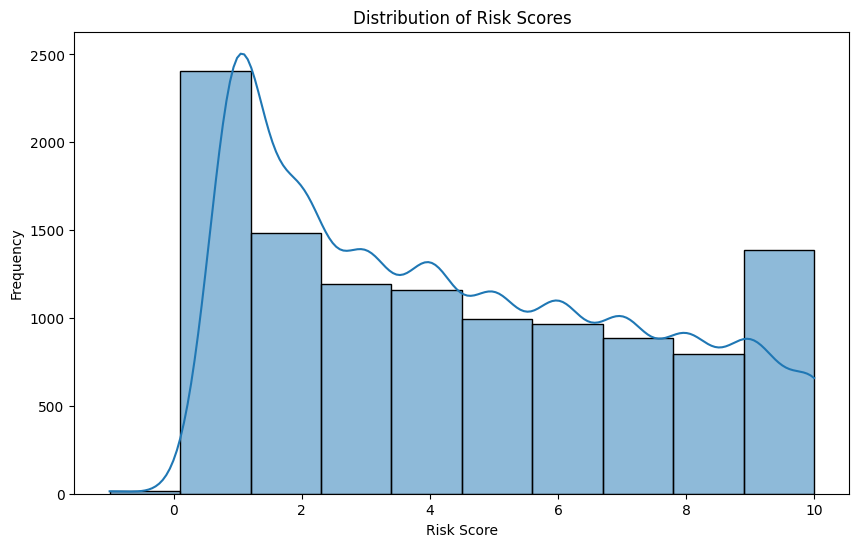

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_data['RiskScore'], kde=True, bins=10)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

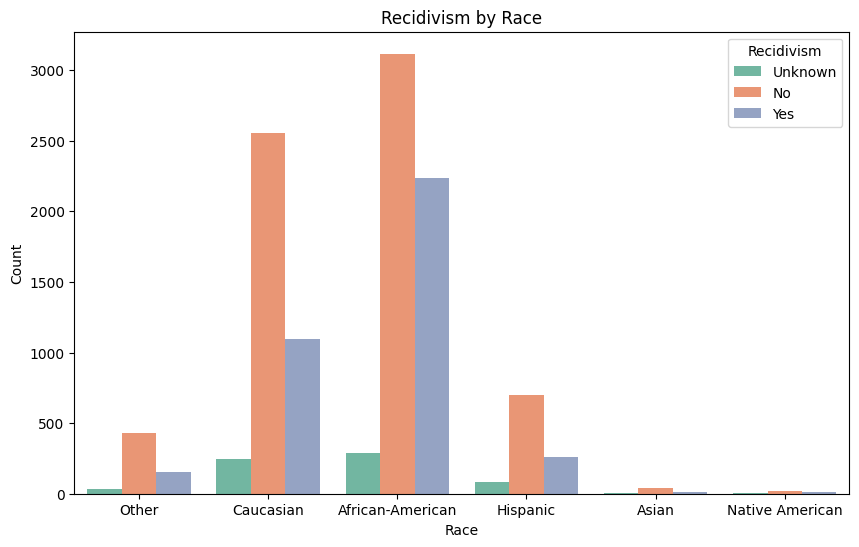

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Recidivism',data=df_data,palette='Set2')
plt.title('Recidivism by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Recidivism', labels=['Unknown', 'No','Yes'])
plt.show()

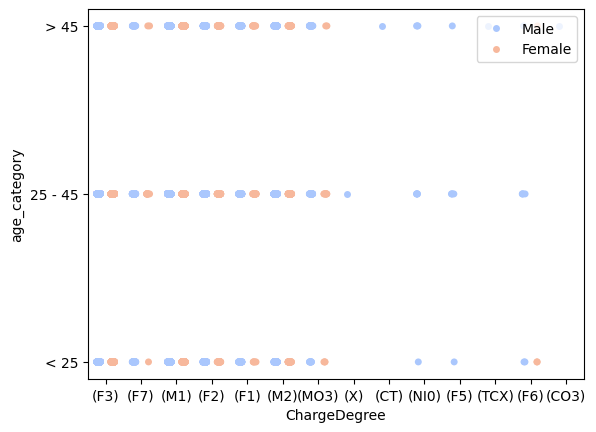

In [ ]:
sns.stripplot(x='ChargeDegree',y='age_category',data=df_data,hue='Gender',palette='coolwarm',jitter=True,dodge=True)
plt.legend(loc=0)

<ipython-input-47-f98532772141>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df_data, palette='coolwarm')


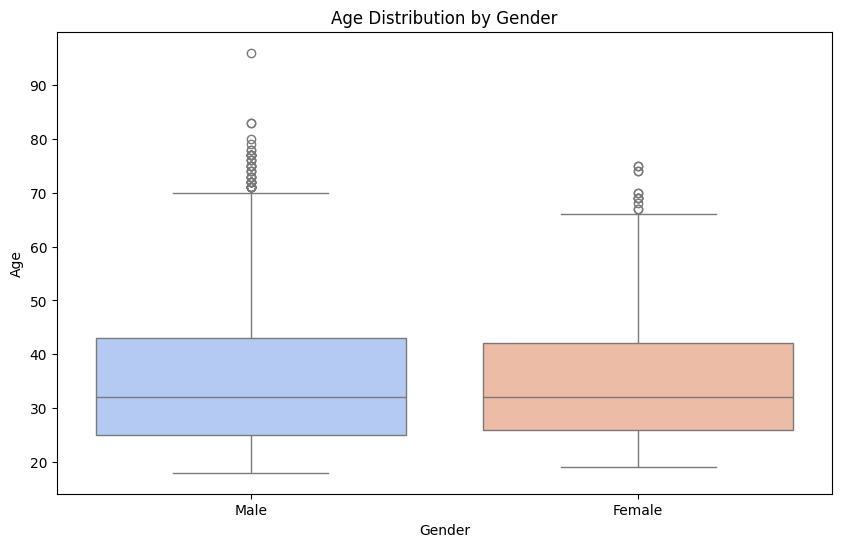

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df_data, palette='coolwarm')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


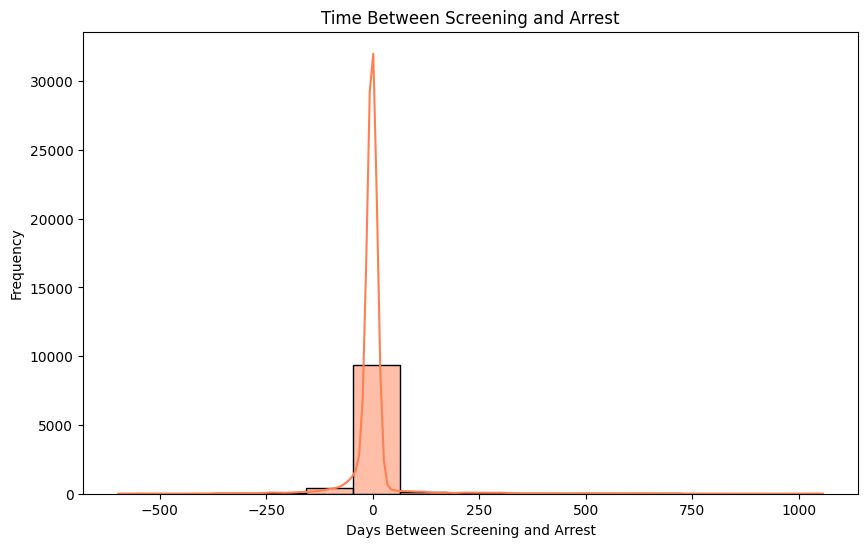

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_data['DaysBetweenScreeningAndArrest'], kde=True, bins=15, color='coral')
plt.title('Time Between Screening and Arrest')
plt.xlabel('Days Between Screening and Arrest')
plt.ylabel('Frequency')
plt.show()


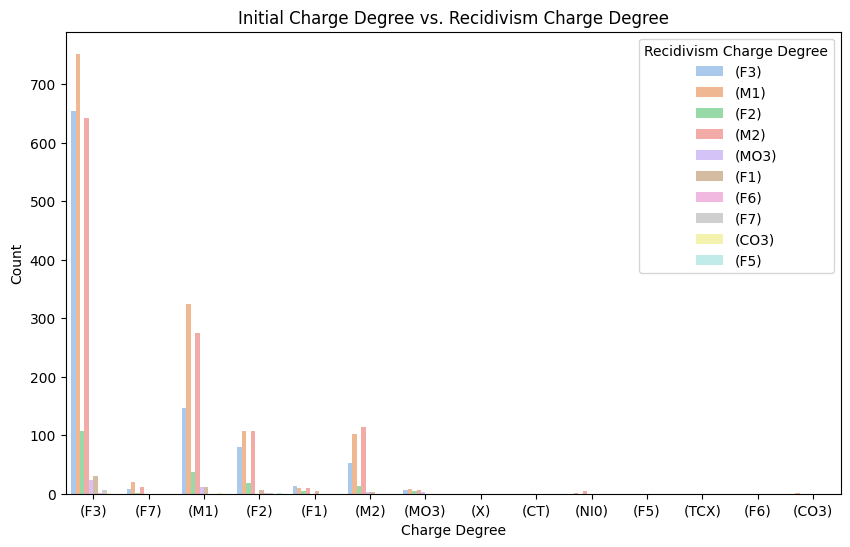

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ChargeDegree', hue='RecidivismChargeDegree', data=df_data, palette='pastel')
plt.title('Initial Charge Degree vs. Recidivism Charge Degree')
plt.xlabel('Charge Degree')
plt.ylabel('Count')
plt.legend(title='Recidivism Charge Degree')
plt.show()


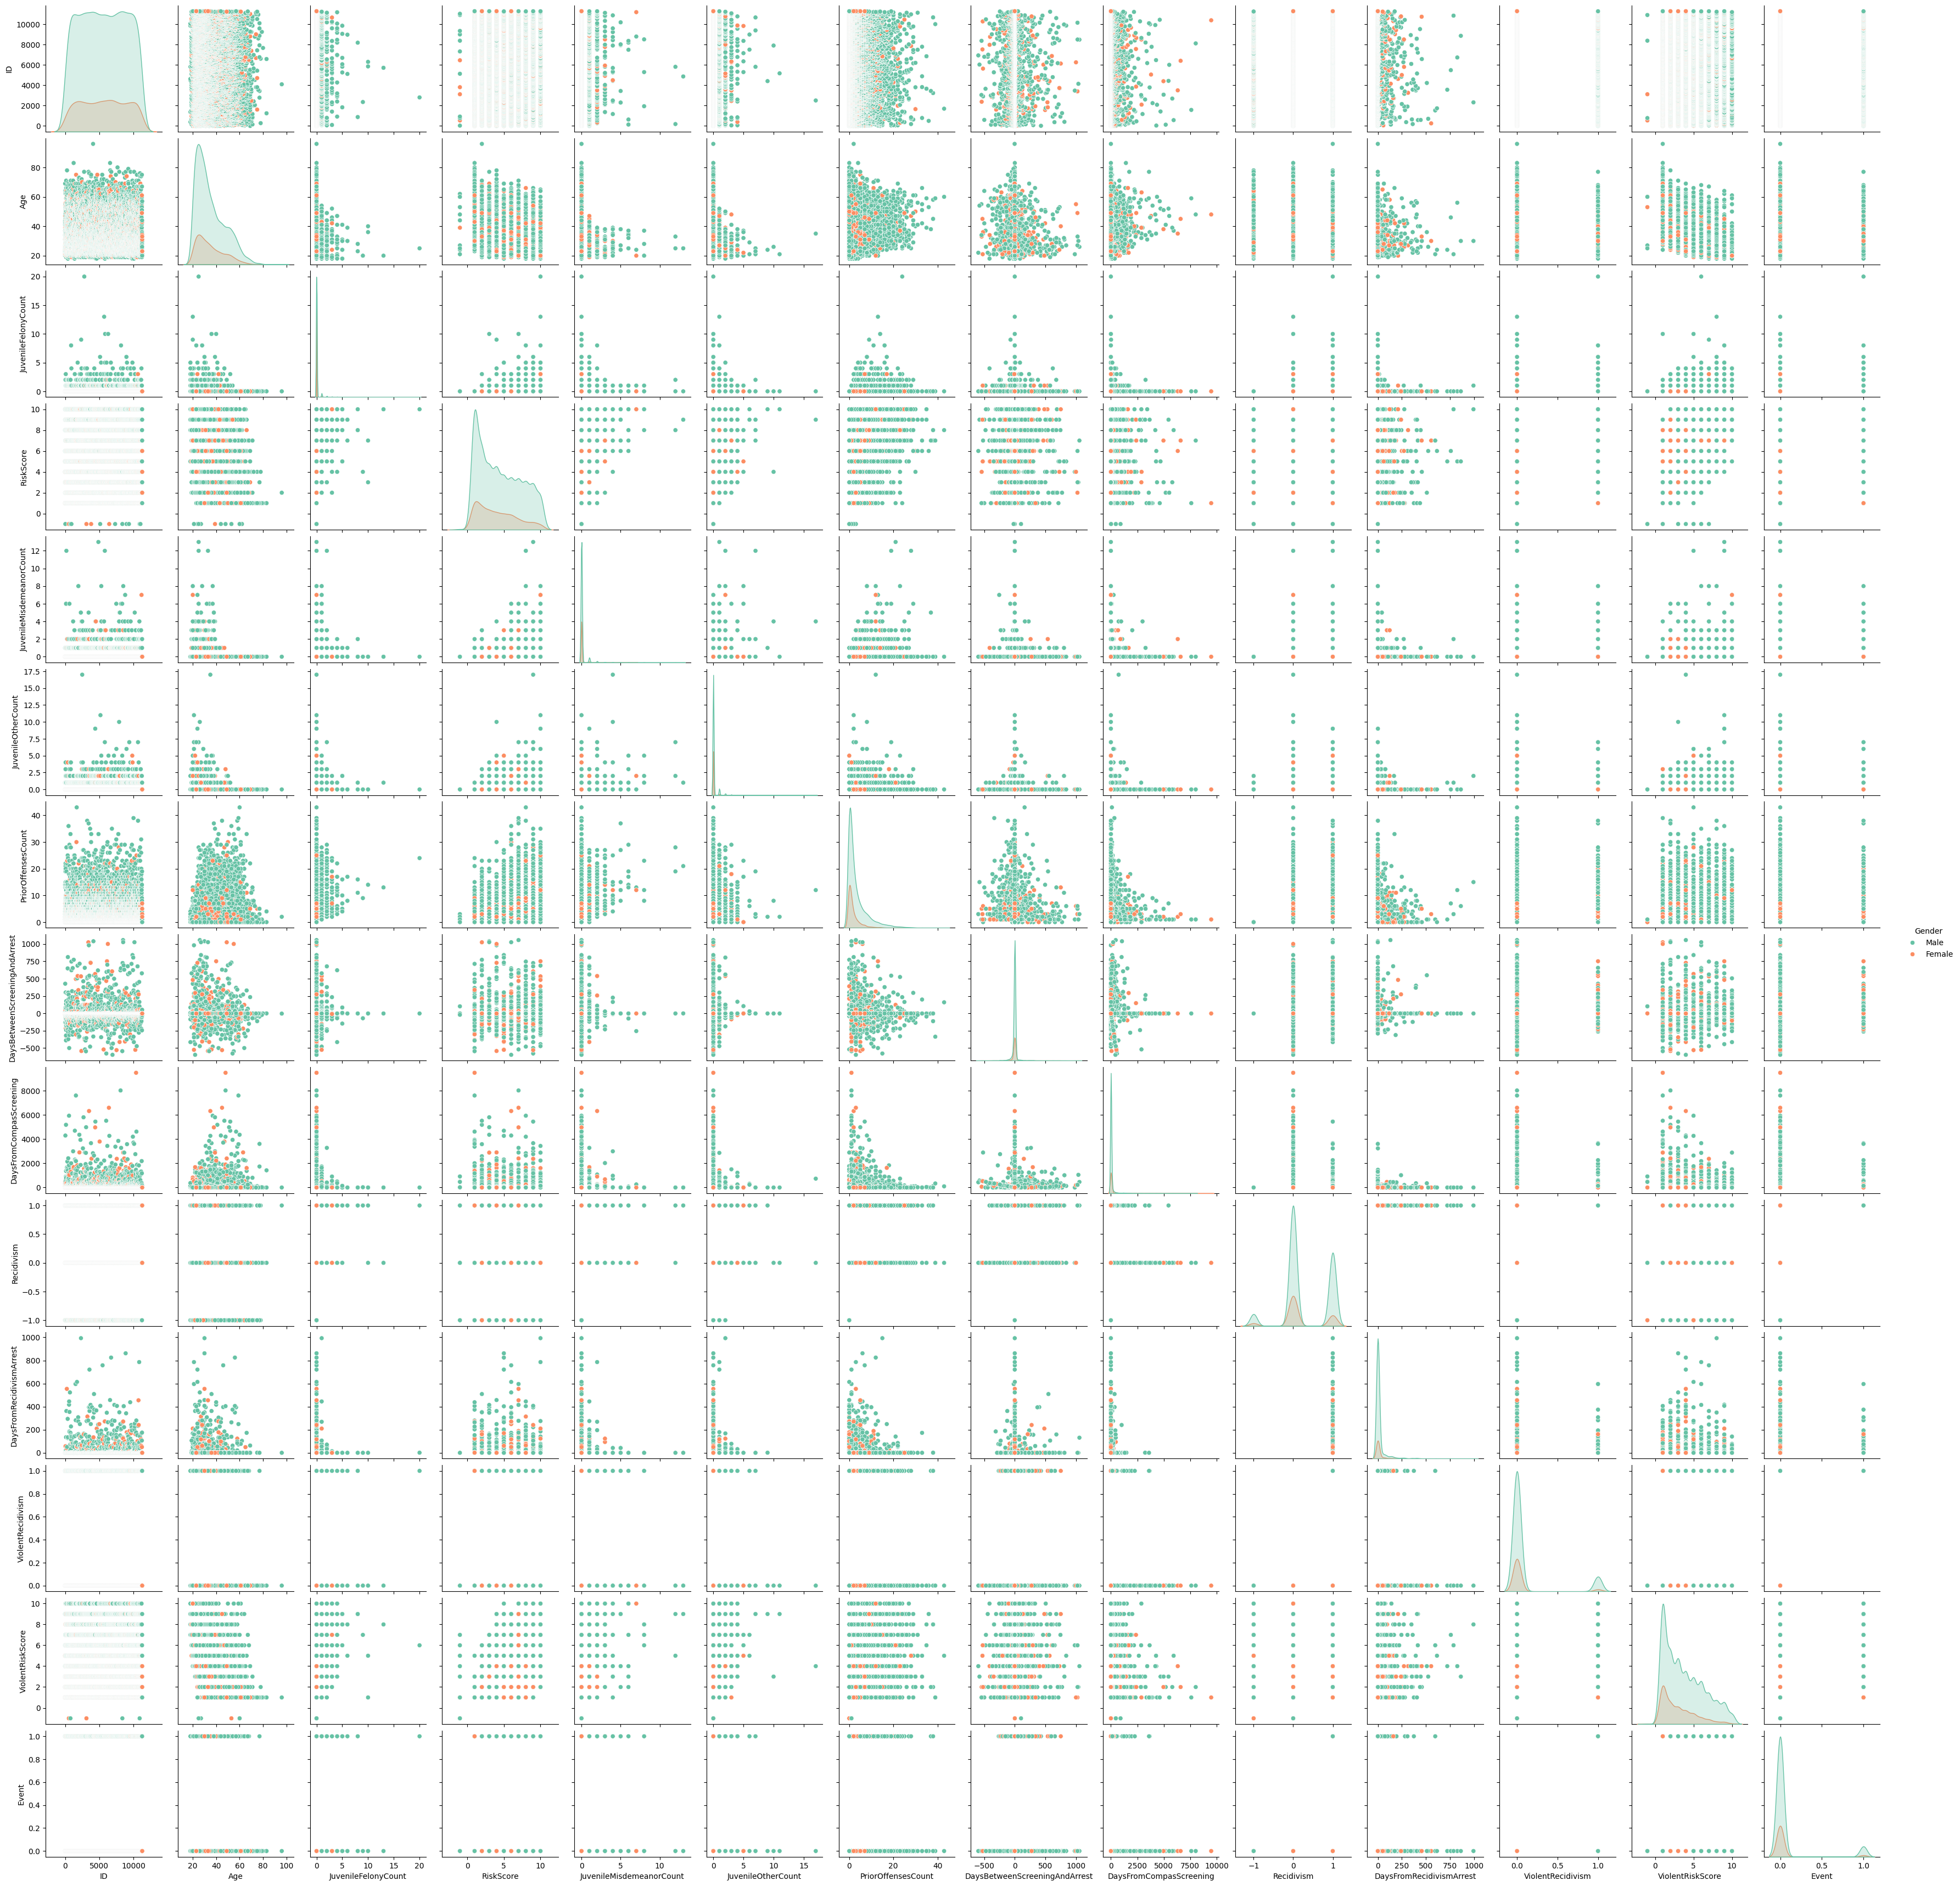

In [ ]:
sns.pairplot(df_data,hue='Gender',palette='Set2')

#Machine Learning Model

##Classification Models

###Logistic Regression

In [151]:
x= df[['Age', 'Gender', 'RiskScore', 'ViolentRiskScore']]
y = df['Event']


In [152]:
x_normalize=preprocessing.StandardScaler()
x_norm=x_normalize.fit_transform(x)

In [153]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.2,
                                                               random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9032, 4), (2258, 4), (9032,), (2258,))

In [154]:
l_model=linear_model.LogisticRegression()
l_model.fit(x_train,y_train)

LogisticRegression()

In [155]:
yl_pred=l_model.predict(x_test)

Accuracy score: 0.9273693534100974
Precision score: 0.0
Recall score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


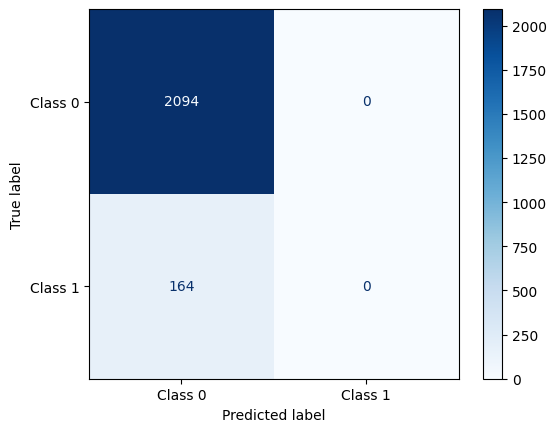

In [156]:
print(f'Accuracy score: {metrics.accuracy_score(y_test,yl_pred)}')
cm=metrics.confusion_matrix(y_test,yl_pred)
print(f'Precision score: {metrics.precision_score(y_test,yl_pred)}')
print(f'Recall score: {metrics.recall_score(y_test,yl_pred)}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')

###Support Vector Machine (SVM)

In [200]:
x= df[['Age', 'Gender', 'RiskScore', 'ViolentRiskScore']]
y = df['Event']
x_normalize=preprocessing.StandardScaler()
x_norm=x_normalize.fit_transform(x)
x.shape,y.shape,x_norm.shape

((11290, 4), (11290,), (11290, 4))

In [201]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.2,
                                                               random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9032, 4), (2258, 4), (9032,), (2258,))

In [202]:
svc_model=svm.SVC(kernel='linear')
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [203]:
ys_pred=svc_model.predict(x_test)

Accuracy score: 0.9273693534100974
Precision score: 0.0
Recall score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


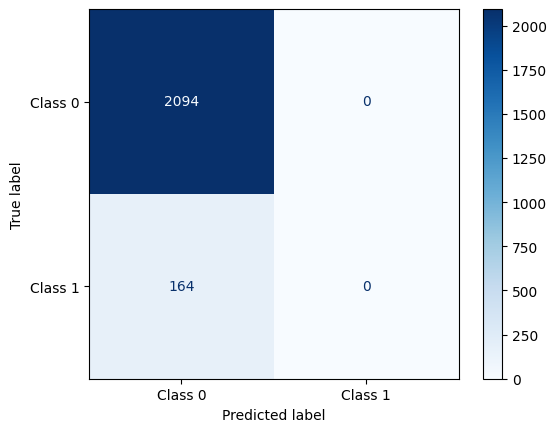

In [204]:
print(f'Accuracy score: {metrics.accuracy_score(y_test,ys_pred)}')
cm=metrics.confusion_matrix(y_test,ys_pred)

print(f'Precision score: {metrics.precision_score(y_test,ys_pred)}')
print(f'Recall score: {metrics.recall_score(y_test,ys_pred)}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')

##Modal Comparison

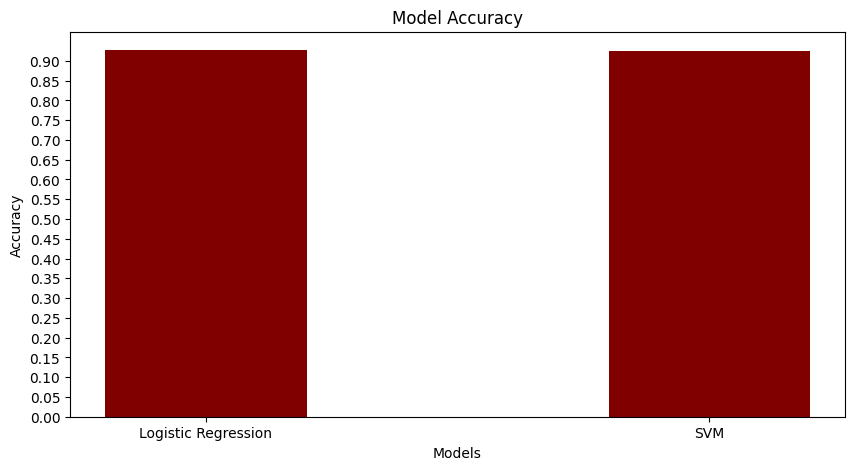

In [171]:
models = ['Logistic Regression', 'SVM']
accuracy = [metrics.accuracy_score(y_test, yl_pred), metrics.accuracy_score(y_test, ys_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
y_ticks = np.arange(0, 0.95, 0.05)
plt.yticks(y_ticks)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

##Regression Models

###Support Vector Machine (SVM)

In [185]:
x= df[['Age', 'Gender', 'RiskScore']]
y = df['ViolentRiskScore']
y_norm=(y-y.mean())/y.std()
x_norm=(x-x.mean())/x.std()

In [186]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size = 0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((9032, 3), (2258, 3), (9032,), (2258,))

In [187]:
svr_model=svm.SVR()
svr_model.fit(x_train,y_train)

SVR()

In [188]:
ysv_pred=svr_model.predict(x_test)

In [189]:
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test,ysv_pred)}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test,ysv_pred)}')
print(f'R2 Score: {metrics.r2_score(y_test,ysv_pred)}')

Mean Squared Error: 1.4901574193352027
Mean Absolute Error: 0.8225036834341165
R2 Score: 0.7701327134763127


###Linear Regression

In [190]:
x= df[['Age', 'Gender', 'RiskScore']]
y = df['ViolentRiskScore']
x.shape,y.shape

((11290, 3), (11290,))

In [191]:
y_normalize = preprocessing.MinMaxScaler()
y_norm = y_normalize.fit_transform(y.values.reshape(-1, 1))
x_normalize=preprocessing.StandardScaler()
x_norm=x_normalize.fit_transform(x)

In [192]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y_norm.reshape(-1),train_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2258, 3), (9032, 3), (2258,), (9032,))

In [193]:
r_model=linear_model.LinearRegression()
r_model.fit(x_train,y_train)

LinearRegression()

In [194]:
yr_pred=r_model.predict(x_test)

In [195]:
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test,yr_pred)}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test,yr_pred)}')
print(f'R2 Score: {metrics.r2_score(y_test,yr_pred)}')

Mean Squared Error: 0.015808576347485278
Mean Absolute Error: 0.09685118244104599
R2 Score: 0.7002948827984075


#Conclusion

The model accuracies of Logistic Regression, and SVM are quite similar i.e. 92.5 %. So, we can use any of these models to predict the reoffending.

Both Logistic Regression and SVM are strong candidates for predicting reoffending, with similar high accuracy. The final choice between the two models should consider factors such as interpretability, computational efficiency, and the specific needs of the deployment environment. Logistic Regression offers simplicity and transparency, while SVM provides flexibility and robustness for more complex scenarios.